<a href="https://colab.research.google.com/github/yh08037/Introduction-to-Intelligent-Systems/blob/master/HW5_2_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5-2 Principas Component Analasis
## A) Reducing the dimension of som synthetic data
### 1. Loading data and Initialization

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


name_file = "./data_pca.txt"

columns = ['x1', 'x2']

x = np.asarray(pd.read_csv(name_file, names=columns, sep=' '))


I, N = x.shape

P = 1

### 2. Implement the PCA

In [0]:
# compute mu : centroid of data

mu = np.zeros(N)

for i in range(I):
    mu += x[i]
mu = mu / I


# compute x_tilde : translate x so that the centroid is origin

x_tilde = np.empty(x.shape)

for i in range(I):
    x_tilde[i] = x[i] - mu
    

# compute sigma : covariance matrix
    
sigma = np.zeros((N, N))

for i in range(I):
    sigma += np.matmul(x_tilde[i].reshape(-1, 1), x_tilde[i].reshape(1, -1))
sigma = sigma / I


# get eigenvalues, eigenvectors of sigma

eigvals, eigvecs = np.linalg.eig(sigma)


# get u : P pricipal eigenvectors
#       : eigenvectors correspoding to the P highest eigenvalues

u = eigvecs[:, eigvals.argsort()[-P:]]


# compute y : project x_tilde onto u

y = np.empty((I, P))

for i in range(I):
    y[i] = np.asarray([np.dot(u[:, p], x_tilde[i]) for p in range(P)])
    

### 3. Indicate the principal axes of the data

In [3]:
print('Principal axes of the data')
for p in range(P):
    print(' u%d : ' %(p+1), u[:, p], '\tnorm : ', np.linalg.norm(u[:, p]))

Principal axes of the data
 u1 :  [0.76908317 0.63914872] 	norm :  1.0


### 4. Test model with new data

In [4]:
I_test = 10

x_test = np.random.uniform(0, 8, (I_test, N))

x_test_tilde = np.empty(x_test.shape)

for i in range(I_test):
    x_test_tilde[i] = x_test[i] - mu
    
y_test = np.empty((I_test, P))

for i in range(I_test):
    y_test[i] = np.asarray([np.dot(u[:, p], x_test_tilde[i]) for p in range(P)])
    

print('x_test \t\t\t\t x_test_tilde \t\t\t y_test')
print()
for i in range(I_test):
    print(x_test[i], '\t', x_test_tilde[i], '\t', y[i])

x_test 				 x_test_tilde 			 y_test

[1.72028108 0.74917605] 	 [-2.26898292 -4.25362995] 	 [-1.49874228]
[7.69889701 1.72326224] 	 [ 3.70963301 -3.27954376] 	 [0.95842326]
[3.33408659 5.96727479] 	 [-0.65517741  0.96446879] 	 [-1.40323452]
[4.02311447 0.93913634] 	 [ 0.03385047 -4.06366966] 	 [-1.76425091]
[1.73770192 7.16368962] 	 [-2.25156208  2.16088362] 	 [-1.40757522]
[1.02291949 7.73382124] 	 [-2.96634451  2.73101524] 	 [0.87371159]
[2.82819371 5.68622012] 	 [-1.16107029  0.68341412] 	 [-1.2705341]
[6.90208615 3.13811742] 	 [ 2.91282215 -1.86468858] 	 [2.55069325]
[7.34193484 4.01859784] 	 [ 3.35267084 -0.98420816] 	 [0.01467385]
[6.89155014 7.03951709] 	 [2.90228614 2.03671109] 	 [0.83691574]


### 5. Plot training and test results

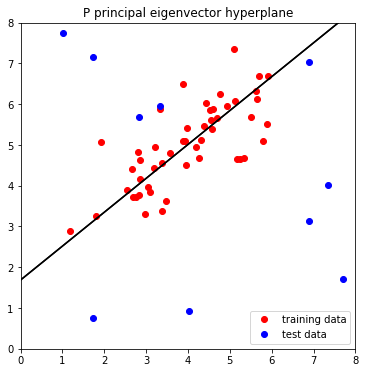

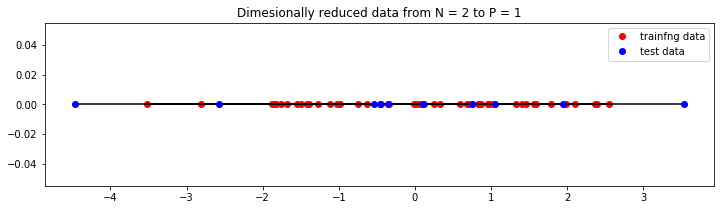

In [5]:
plt.figure(figsize=(6, 6))
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.title('P principal eigenvector hyperplane')
plt.plot(x[:,0], x[:,1], "ro", label='training data')
t = list(range(0, 9))
plt.plot(t, u[1, 0] / u[0, 0] * (t - mu[0]) + mu[1], 'k')

plt.plot(x_test[:,0], x_test[:,1], "bo", label='test data')
plt.plot(t, u[1, 0] / u[0, 0] * (t - mu[0]) + mu[1], 'k')

plt.legend()
plt.show()


plt.figure(figsize=(12, 3))
plt.title('Dimesionally reduced data from N = 2 to P = 1')
plt.plot(y, np.zeros(y.shape), 'k')
plt.plot(y, np.zeros(y.shape), 'ro', label='trainfng data')

plt.plot(y_test, np.zeros(y_test.shape), 'k')
plt.plot(y_test, np.zeros(y_test.shape), 'bo', label='test data')

plt.legend()
plt.show()